In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
np.random.seed(0)
n_samples = 200

# Distribution 1: Centered at (0,0) with no correlation
mean1 = [0, 0]
cov1 = [[12, 0], [0, 9]]
samples1 = np.random.multivariate_normal(mean1, cov1, n_samples)

# Distribution 2: Centered at (3,3) with positive correlation
mean2 = [10, 18]
cov2 = [[13,0], [0, 10]]
samples2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# Distribution 3: Centered at (-3,3) with negative correlation
mean3 = [20, 7]
cov3 = [[8, 0], [0, 14]]
samples3 = np.random.multivariate_normal(mean3, cov3, n_samples)

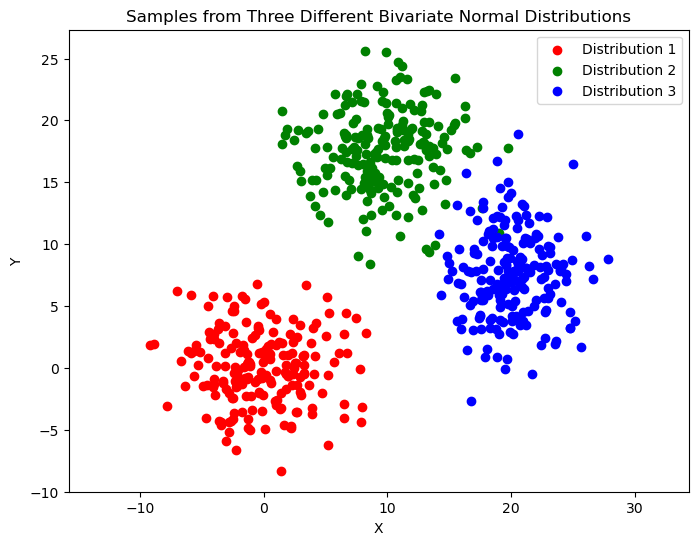

In [23]:

# Plot the samples with different colors
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], color='red', label='Distribution 1')
plt.scatter(samples2[:, 0], samples2[:, 1], color='green', label='Distribution 2')
plt.scatter(samples3[:, 0], samples3[:, 1], color='blue', label='Distribution 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Samples from Three Different Bivariate Normal Distributions')
plt.legend()
plt.axis('equal')
plt.show()


In [4]:
#!/usr/bin/env python
import numpy as np

# Set random seed for reproducibility.
np.random.seed(0)
n_samples = 200

# Generate three distributions.
# Distribution 1:
mean1 = [0, 0]
cov1 = [[12, 0], [0, 9]]
samples1 = np.random.multivariate_normal(mean1, cov1, n_samples)
labels1 = np.ones((n_samples, 1), dtype=int)  # Label 1

# Distribution 2:
mean2 = [10, 18]
cov2 = [[13, 0], [0, 10]]
samples2 = np.random.multivariate_normal(mean2, cov2, n_samples)
labels2 = 2 * np.ones((n_samples, 1), dtype=int)  # Label 2

# Distribution 3:
mean3 = [20, 7]
cov3 = [[8, 0], [0, 14]]
samples3 = np.random.multivariate_normal(mean3, cov3, n_samples)
labels3 = 3 * np.ones((n_samples, 1), dtype=int)  # Label 3

# Combine samples with labels.
data1 = np.hstack((samples1, labels1))
data2 = np.hstack((samples2, labels2))
data3 = np.hstack((samples3, labels3))
data_with_labels = np.vstack((data1, data2, data3))

# Shuffle the data so that the order is random.
np.random.shuffle(data_with_labels)

# Create data without labels (only x and y columns).
data_without_labels = data_with_labels[:, :2]

# Export the data without labels to data.txt.
with open("data.txt", "w") as f:
    for point in data_without_labels:
        f.write(f"{point[0]},{point[1]}\n")

# Export the data with labels to data_with_labels.txt.
with open("data_with_labels.txt", "w") as f:
    for point in data_with_labels:
        f.write(f"{point[0]},{point[1]},{int(point[2])}\n")

print(f"Exported {data_with_labels.shape[0]} data points to data.txt and data_with_labels.txt")


Exported 600 data points to data.txt and data_with_labels.txt


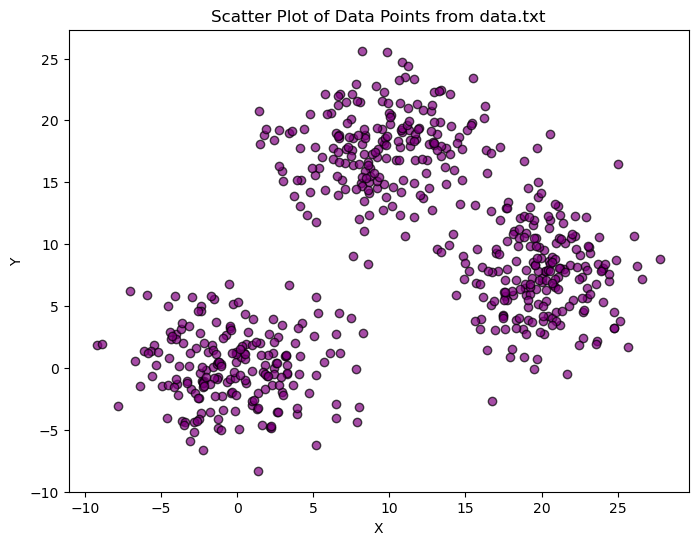

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from data.txt
# Each line in data.txt is expected to be in the format: x,y
data = np.loadtxt("data.txt", delimiter=",")

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color='purple', alpha=0.7, edgecolors='k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of Data Points from data.txt")
plt.show()

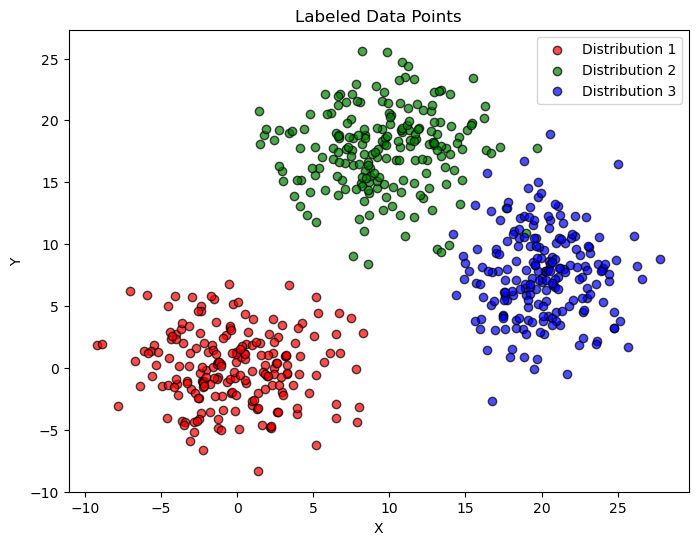

In [6]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# Load the data from data_with_labels.txt
# Each line is expected to be: x,y,label
data = np.loadtxt("data_with_labels.txt", delimiter=",")

# Separate the columns into features and labels
x = data[:, 0]
y = data[:, 1]
labels = data[:, 2].astype(int)  # Ensure labels are integers

# Get unique labels for plotting
unique_labels = np.unique(labels)

# Define a color map (you can customize these colors as needed)
colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 6))

# Plot each distribution using its label and assigned color
for i, label in enumerate(unique_labels):
    subset = data[labels == label]
    plt.scatter(subset[:, 0], subset[:, 1], color=colors[i % len(colors)],
                alpha=0.7, edgecolors='k', label=f"Distribution {label}")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Labeled Data Points")
plt.legend()
plt.show()